In [208]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Параметры

In [209]:
z = 10; B = 50
p0 = 100 * 1e5; p_inj = 150 * 1e5; p_prod = 50 * 1e5
k = 1e-14; mu = 1e-3; phi = 0.2
rho0 = 1000; cf = 1e-4 / 1e5; p_0 = 120 * 1e5
rho = lambda p: rho0 * (1 + cf * (p - p_0))

### Вычисления

In [210]:
def rho_next(n, i, p):
    if p[n][i] >= p[n][i+1]:
        return rho(p[n][i])
    else:
        return rho(p[n][i+1])

def rho_prev(n, i, p):
    if p[n][i-1] >= p[n][i]:
        return rho(p[n][i-1])
    else:
        return rho(p[n][i])

In [211]:
def three_diag_progonka(a, b, c, d):
    n = len(b)
    p, q = np.zeros(n), np.zeros(n)
    c = c + [0]
    p[0] = c[0] / b[0]
    q[0] = d[0] / b[0]
    for i in range(1, n):
        p[i] = c[i] / (b[i] - (a[i - 1] * p[i - 1]))
        q[i] = (d[i] - (a[i - 1] * q[i - 1])) / (b[i] - (a[i - 1]*p[i - 1]))
    x = np.zeros(n)
    m = n - 1
    x[m] = q[-1]
    for i in range(n - 2, -1, -1):
        x[i] = q[i] - (x[i + 1] * p[i])
    return x

In [212]:
def solve(N,L):
    x,h = np.linspace(0, 500, L, retstep = True) #сетка по пространству
    t,tau = np.linspace(0, 864000, N + 1, retstep = True) #сетка по времени
    p = np.zeros([N + 1, L])
    p[0, :] = p0 #начальные условия
    p[0][0] = p_inj
    p[0][0] = p_inj
    for n in range(N):
        c = []; b = [0]; a = [1]; d = [p_inj]
        for i in range(1, L - 1):
            c.append(k * rho_prev(n, i, p) / (mu * h**2))
            b.append(k * rho_next(n, i, p) / (mu * h**2))
            a.append(-c[i-1] - b[i] - (phi * cf * rho0 / tau))
            d.append((-phi * cf * rho0 * p[n][i]) / tau)
        c.append(0); a.append(1); d.append(p_prod)
        A = np.diagflat(c, -1) + np.diagflat(a) + np.diagflat(b, 1) 
        p[n + 1, :] = three_diag_progonka(c, a, b, d) 
    return p, x, t

In [213]:
N = 100; L = 100
p, x, t = solve(N,L)

In [214]:
def plot_graph_by_days(days,p,x,t):
    plt.plot(x, p[int(days*10)], color = 'mediumvioletred', zorder=1)
    plt.scatter(x, p[int(days*10)], color = 'purple', s = 10, zorder=2)
    plt.minorticks_on()
    plt.grid(which='major',
            color = 'grey', 
            linewidth = 0.7)
    plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')
    plt.title(f't = {days} days')
    plt.xlabel('x, м')
    plt.ylabel('p, Па')
    plt.show()

### Графики

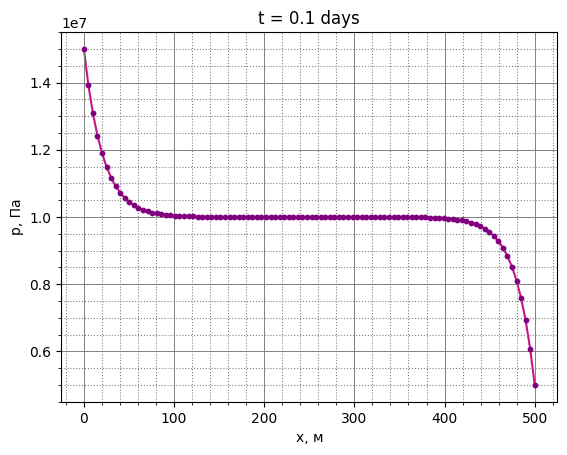

In [215]:
plot_graph_by_days(0.1,p,x,t)

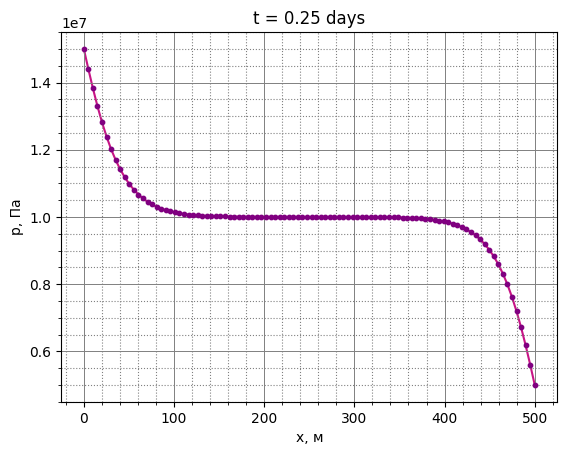

In [216]:
plot_graph_by_days(0.25,p,x,t)

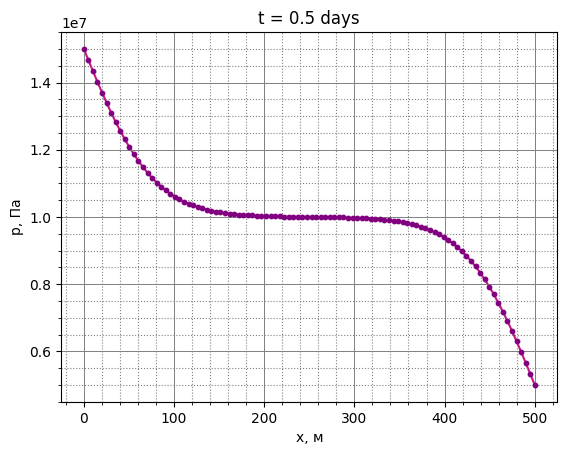

In [217]:
plot_graph_by_days(0.5,p,x,t)

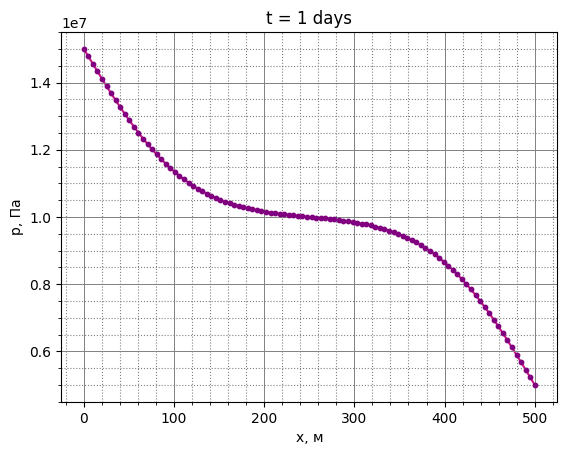

In [218]:
plot_graph_by_days(1,p,x,t)

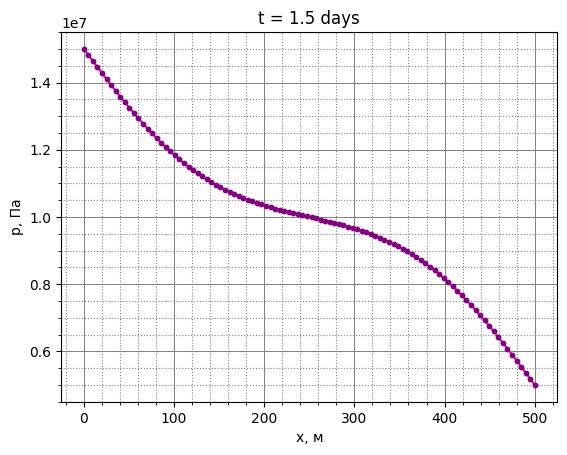

In [219]:
plot_graph_by_days(1.5,p,x,t)

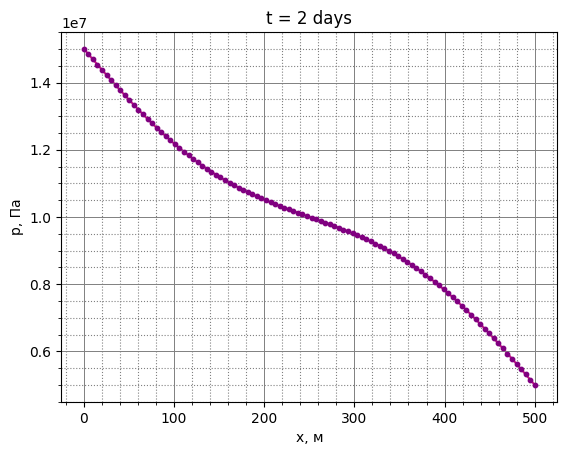

In [220]:
plot_graph_by_days(2,p,x,t)

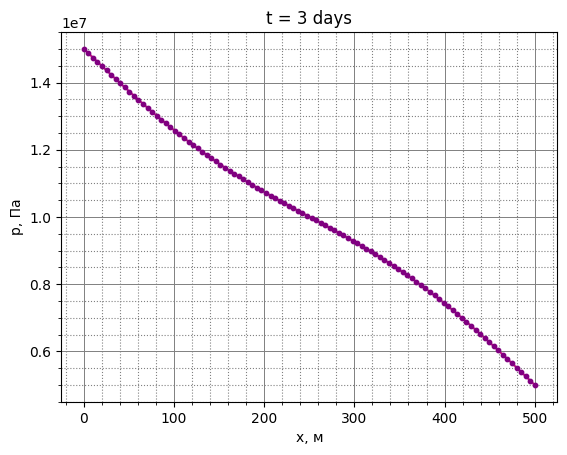

In [221]:
plot_graph_by_days(3,p,x,t)

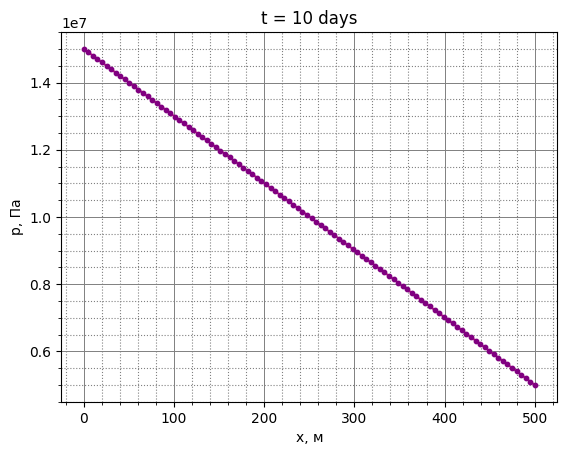

In [222]:
plot_graph_by_days(10,p,x,t)